## imports

In [2]:
from bigraph_viz import plot_bigraph, plot_multitimestep, plot_flow
from bigraph_viz.dict_utils import replace_regex_recursive

save_images = False
plot_settings = {'remove_process_place_edges': True, 'size':'8,5', 'show_types': True, }
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})

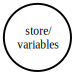

In [3]:
# simple spec
simple_object_spec = {'store/<br/>variables': {}}

# plot
plot_bigraph(simple_object_spec, **plot_settings, filename='store')

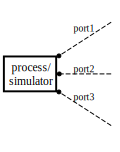

In [4]:
# process spec
process_spec = {
    'process/<br/>simulator': {
        '_ports': {
            'port1': 'type',
            'port2': 'type',
            'port3': 'type'}}}

# plot
plot_settings1 = {'rankdir':'RL', **plot_settings}
plot_bigraph(process_spec, **plot_settings1, filename='process')

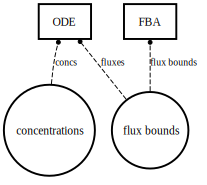

In [5]:
# composite spec
flat_composite_spec = {
    'concentrations': {},
    'flux bounds': {},
    'ODE': {
        '_ports': {'concs': 'type', 'fluxes': 'type',},
        'wires': {
            'concs': 'concentrations',
            'fluxes': 'flux bounds'}},
    'FBA': {
        '_ports': {'flux bounds': 'type'},
        'wires': {
            'flux bounds': 'flux bounds'}}}

# plot
plot_settings1 = {'rankdir':'BT', **plot_settings}
plot_bigraph(flat_composite_spec, **plot_settings1, filename='composite')

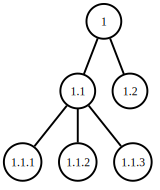

In [6]:
# hierarchy spec
hierarchy = {
    '1': {
        '1.1': {'1.1.1': '',
              '1.1.2': '',
              '1.1.3': ''},
        '1.2': {}}}

# plot
plot_bigraph(hierarchy, **plot_settings, filename='hierarchy')

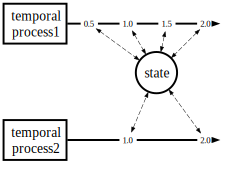

In [7]:
plot_settings3={}
if save_images:
    plot_settings3.update({
        'out_dir': 'out',
        'dpi': '250'
    })

multitimestep_spec = {
    'temporal process2': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal process1': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings3, filename='multitimestep')

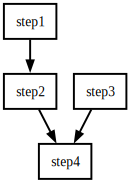

In [8]:
flow = {
    'step1': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step2': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': 'step1', 
    },
    'step3': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': [], 
    },
    'step4': {
        '_type': 'step_process',
        '_ports': {},
        '_depends_on': ['step2', 'step3'], 
    },
}

plot_flow(flow, **plot_settings3, filename='flow')

## Modeling subaim 1

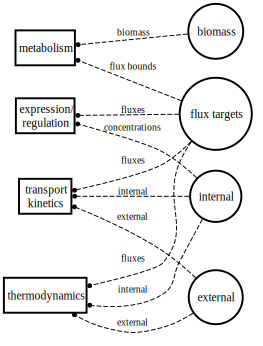

In [13]:
internal_concs = 'internal'
external_concs = 'external'

# aim 1 schema
aim1 = {
    'biomass': {},
    'flux targets': {},
    internal_concs: {},
    external_concs: {},
    'expression/<br/>regulation': {
        '_ports': {'fluxes': '', 'concentrations': ''},
        'wires': {
            'fluxes': 'flux targets',
            'concentrations': internal_concs
        }
    },
    'transport<br/>kinetics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'thermodynamics': {
        '_ports': {'fluxes': '', 'internal': '', 'external': '',},
        'wires': {
            'fluxes': 'flux targets',
            'internal': internal_concs,
            'external': external_concs,
        }
    },
    'metabolism': {
        '_ports': {'flux bounds': '', 'biomass': ''},
        'wires': {
            'flux bounds': 'flux targets',
            'biomass': 'biomass'}
    },
}

# plot
plot_settings2 = {'rankdir':'RL', **plot_settings}
plot_bigraph(aim1, **plot_settings2, filename='aim2')

## Modeling subaim 2

node ('environment',) not in graph


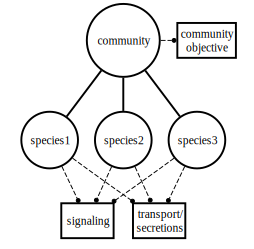

In [11]:
# generic schema
obj_schema = {'_ports': {'1': ''}, 'wires': {'1': []}}
molecular_mechanism_schema = {
            '_ports': {'1': '', '2': '', '3': ''},
            'wires': {
                '1': 'species1',
                '2': 'species2',
                '3': 'species3'}}

# aim 3 schema
aim3 = {
    'community': {
        'species1': {},
        'species2': {},
        'species3': {},
        'community<br/>objective': {
            '_ports': {'1': ''},
            'wires': {'1': []}
        },
        'signaling': molecular_mechanism_schema,
        'transport/<br/>secretions': molecular_mechanism_schema
    },
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',), ('community', 'community<br/>objective')]], 
    'invisible_edges': [
        (('community',), ('community', 'community<br/>objective')),
        (('community',), ('community', 'signaling')),
        (('community',), ('community', 'transport/<br/>secretions')),
    ],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim3, **plot_settings2, filename='aim3')

## Modeling subaim 3

node ('GI tract', 'Duodenum', 'Epithelium') not in graph
node ('GI tract', 'Duodenum', 'Microbiota') not in graph
node ('GI tract', 'Duodenum', 'Mucosa') not in graph


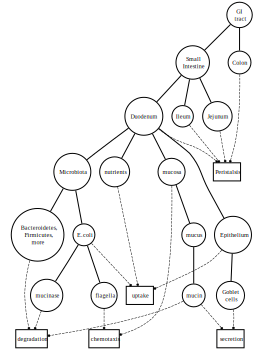

In [14]:
# schema
schema = {
    'GI tract': {
        'Small Intestine': {
            'Duodenum': {
                'nutrients': {},
                'mucosa': {'mucus': {'mucin': 'Any'}},
                'Epithelium': {
                    'Goblet cells': {
                        'secretion': {
                            '_ports': {'secreted': '', 'mucins': ''},
                            'wires': {
                                'secreted': ['..', '..', 'mucosa', 'mucus', 'mucin'],
                                'mucins': ['..', 'Goblet cells',],
                            }
                        }
                    },
                },
                'Microbiota': {
                    'E.coli': {
                        'mucinase': {},
                        'flagella': {},
                         'chemotaxis': {
                            '_ports': {
                                'mucus': 'Any',
                                'flagella': 'Any'
                            },
                            'wires': {
                                'mucus': ['..', '..', 'mucosa'],
                                'flagella': ['flagella'],
                            }
                         }
                    },
                    'Bacteroidetes, Firmicutes, more': {},
                    # 'Firmicutes': {},
                }, 
                'uptake': {
                    '_ports': {
                        '1': '', '2': '', '3': '', 
                    },
                    'wires': {
                        '1': ['nutrients'],
                        '2': ['Microbiota', 'E.coli'],
                        '3': ['Epithelium'],
                    }
                },
                'degradation': {
                    '_ports': {
                        '1': '', '2': '', '3': '', 
                    },
                    'wires': {
                        '1': ['mucosa', 'mucus', 'mucin'],
                        '2': ['Microbiota', 'E.coli', 'mucinase'],
                        '3': ['Microbiota', 'Bacteroidetes, Firmicutes, more'],
                    }
                },
            },
            'Jejunum': {},
            'Ileum': {},
        },
        'Colon': {},
        'Peristalsis': {
            '_ports': {
                '1': '', '2': '', '3': '', 
                '4': '',
            },
            'wires': {
                '1': ['Small Intestine', 'Duodenum'],
                '2': ['Small Intestine', 'Jejunum'],
                '3': ['Small Intestine', 'Ileum'],
                '4': ['Colon'],
            }
         },
    },
}

schema = replace_regex_recursive(schema)
# plot
plot_settings2 = {
    'node_groups':[
        [
            ('GI tract', 'Duodenum', 'Epithelium'), 
            ('GI tract', 'Duodenum', 'Microbiota'), 
            ('GI tract', 'Duodenum', 'Mucosa')
        ]
    ], 
    'remove_process_place_edges': True,
    'port_labels': False,
    **plot_settings}
plot_bigraph(schema, **plot_settings2, filename='gut_microbiome')

## Modeling subaim 4

node ('environment',) not in graph


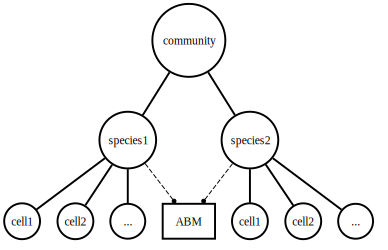

In [12]:
# aim 4 schema
aim4 = {
    'community': {
        'species1': {'cell1': {}, 'cell2': {}, '...': {}},
        'species2': {'cell1': {}, 'cell2': {}, '...': {}},
        'ABM': {
            '_ports': {
                '1': '', 
                '2': '', 
                # 'env': '',
            },
            'wires': {
                '1': 'species1',
                '2': 'species2',
                # 'env': ['..', '..', 'environment'],
            }}},
    # 'environment': {}
}

# plot
plot_settings2 = {
    'node_groups':[[('environment',), ('community',)]], 
    'invisible_edges': [(('community',), ('community', 'ABM'))],
    'port_labels': False,
    **plot_settings}
plot_bigraph(aim4, **plot_settings2, filename='aim4')